In [1]:
import numpy as np
import BasisFunction as bf
import GradientDescent as gd
import LinearRegression as lr
import matplotlib.pyplot as plt

In [2]:
class Generator_2D:
    def __init__(self, function, xRange):
        self.x = np.linspace(xRange[0], xRange[1], xRange[2]).reshape(-1, 1)
        self.y = function(self.x)
        self.function = function
        self.xRange = xRange

    def plot(self, label = None, newFig = False, figsize=(8, 6)):
        if newFig:
            plt.figure(figsize = figsize)
        plt.plot(self.x.ravel(), self.y.ravel(), label = label)
        plt.xlim(xRange[0], xRange[1])
        plt.legend()
        return self
        
    def generateNoisyPoints(self, N, seed = 0, sigma = 0.1):
        np.random.seed(seed)
        xgen = np.random.uniform(self.xRange[0], self.xRange[1], N).reshape(-1, 1)
        ynoise = np.random.normal(0, np.sqrt(sigma), N).reshape(-1, 1)
        ygen = self.function(xgen) + ynoise
        return (xgen, ygen)

In [3]:
NTrainPoints = 50
NTestPoints = 20
Nsigma = 0.1

xRange = (0, 2*np.pi, 500)
# func = lambda x: 1/(1 - np.exp(-x) + 0.0000001)
# func = lambda x: np.add(2*x, 3*np.sin(x))
func = lambda x: np.sin(x)
basisFuncs = [
    lambda x: x,
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5),
#     lambda x: np.power(x, 6),
#     lambda x: np.power(x, 7),
#     lambda x: np.power(x, 8),
#     lambda x: np.power(x, 9),
#     lambda x: np.power(x, 10),
]

MSE test set = 0.09071648067945591
MSE train set = 0.08195515100449949
[[-0.19210439]
 [ 1.65782424]
 [-0.53330297]
 [-0.08158472]
 [ 0.03587994]
 [-0.00255995]]


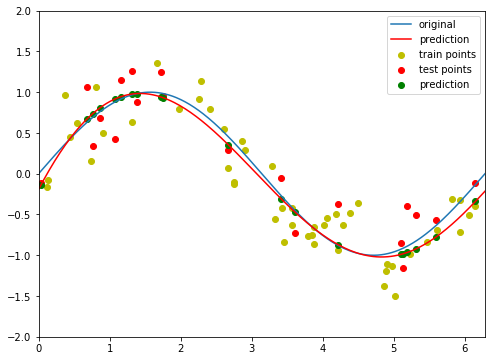

In [4]:
"""
linear regression using normal linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

normalLR_polinomial = lr.LinearRegressor(basisFuncs, xgen, ygen).fit()

ypred_test = normalLR_polinomial.predict(xtest)
print("MSE test set = {}".format(normalLR_polinomial.meanSquareError(ytest)))

normalLR_polinomial.predict(xgen)
print("MSE train set = {}".format(normalLR_polinomial.meanSquareError(ygen)))
print(normalLR_polinomial.w)

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = normalLR_polinomial.predict(xPredictLine)

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()

MSE test set = 0.09811980622957997
MSE train set = 0.08481155910260067


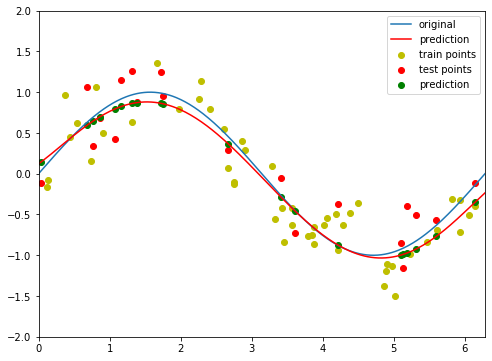

In [5]:
"""
linear regression using ridge linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

ridgeLR_polinomial = lr.RidgeLinearRegressor(basisFuncs, xgen, ygen, lamb = 0.5).fit()

ypred_test = ridgeLR_polinomial.predict(xtest)
print("MSE test set = {}".format(ridgeLR_polinomial.meanSquareError(ytest)))

ridgeLR_polinomial.predict(xgen)
print("MSE train set = {}".format(ridgeLR_polinomial.meanSquareError(ygen)))

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = ridgeLR_polinomial.predict(xPredictLine)

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()


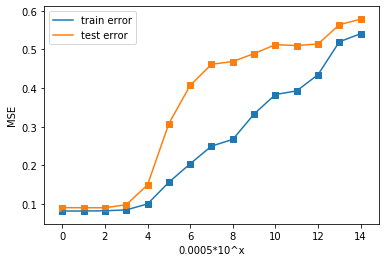

In [17]:
def trainAndTest(lamb, xtrain, ytrain, xtest, ytest):
    model = lr.RidgeLinearRegressor(basisFuncs, xtrain, ytrain, lamb = lamb).fit()
    model.predict(xtrain)
    trainErr = model.meanSquareError(ytrain)
    model.predict(xtest)
    testErr = model.meanSquareError(ytest)
    return trainErr, testErr
    
N_lamb = 15
baseLamb = 0.0005
xtrain_lamb, ytrain_lamb = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
xtest_lamb, ytest_lamb = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)

mseLstTest = []
mseLstTrain = []

for i in range(N_lamb):
    newLamb = baseLamb * (10**i)
    trainErr, testErr = trainAndTest(newLamb, xtrain_lamb, ytrain_lamb, xtest_lamb, ytest_lamb)
    mseLstTrain.append(trainErr)
    mseLstTest.append(testErr)
    
xLambPlot = np.array([i for i in range(N_lamb)])
mseLstTrain = np.array(mseLstTrain)
mseLstTest = np.array(mseLstTest)

plt.plot(xLambPlot, mseLstTrain, label = "train error")
plt.plot(xLambPlot, mseLstTest, label = "test error")
plt.scatter(xLambPlot, mseLstTrain, marker = 's')
plt.scatter(xLambPlot, mseLstTest, marker = 's')
plt.xlabel("{}*10^x".format(baseLamb))
plt.ylabel("MSE")
plt.legend()

-----------
xSmallest = 
[[-0.4282703 ]
 [ 0.70446629]
 [ 0.94826592]
 [ 0.76008828]
 [-0.33477937]
 [-0.10690405]]
ySmallest = [[7873095.86904885]]
total running steps: -1
found smallest y at step: 0
-----------
-----------
xSmallest = 
[[-0.44269223]
 [ 0.66946066]
 [ 0.87280025]
 [ 0.63663968]
 [-0.39673182]
 [ 0.04420577]]
ySmallest = [[589.35114591]]
total running steps: -1
found smallest y at step: 50000
-----------
-----------
xSmallest = 
[[-0.45448797]
 [ 0.64185982]
 [ 0.81833777]
 [ 0.56760429]
 [-0.3605717 ]
 [ 0.04034313]]
ySmallest = [[489.72209504]]
total running steps: -1
found smallest y at step: 100000
-----------
-----------
xSmallest = 
[[-0.46507447]
 [ 0.61684017]
 [ 0.76882094]
 [ 0.50474218]
 [-0.32766044]
 [ 0.03682802]]
ySmallest = [[407.2892975]]
total running steps: -1
found smallest y at step: 150000
-----------
-----------
xSmallest = 
[[-0.47456143]
 [ 0.59416809]
 [ 0.7238025 ]
 [ 0.44749529]
 [-0.29770431]
 [ 0.03362902]]
ySmallest = [[339.08342121]]
to

-----------
xSmallest = 
[[-0.52820102]
 [ 0.39733299]
 [ 0.29297603]
 [-0.12609336]
 [-0.00167373]
 [ 0.00214695]]
ySmallest = [[11.5637433]]
total running steps: -1
found smallest y at step: 1950000
-----------
-----------
xSmallest = 
[[-5.27094886e-01]
 [ 3.97435365e-01]
 [ 2.91698163e-01]
 [-1.28670660e-01]
 [-4.77450574e-04]
 [ 2.02403883e-03]]
ySmallest = [[11.4541314]]
total running steps: -1
found smallest y at step: 2000000
-----------
-----------
xSmallest = 
[[-0.52595942]
 [ 0.39760599]
 [ 0.29055466]
 [-0.13107777]
 [ 0.00062966]
 [ 0.00191066]]
ySmallest = [[11.3574982]]
total running steps: -1
found smallest y at step: 2050000
-----------
-----------
xSmallest = 
[[-0.52479761]
 [ 0.39783849]
 [ 0.28953331]
 [-0.13332992]
 [ 0.00165563]
 [ 0.00180595]]
ySmallest = [[11.27163302]]
total running steps: -1
found smallest y at step: 2100000
-----------
-----------
xSmallest = 
[[-0.52361217]
 [ 0.39812708]
 [ 0.28862303]
 [-0.13544095]
 [ 0.00260772]
 [ 0.00170912]]
ySmalle

-----------
xSmallest = 
[[-4.78767930e-01]
 [ 4.20933825e-01]
 [ 2.84678226e-01]
 [-1.72055377e-01]
 [ 1.67097743e-02]
 [ 3.63976730e-04]]
ySmallest = [[9.90595347]]
total running steps: -1
found smallest y at step: 3850000
-----------
-----------
xSmallest = 
[[-4.77442505e-01]
 [ 4.21713367e-01]
 [ 2.84831073e-01]
 [-1.72754942e-01]
 [ 1.69327090e-02]
 [ 3.44721171e-04]]
ySmallest = [[9.8766808]]
total running steps: -1
found smallest y at step: 3900000
-----------
-----------
xSmallest = 
[[-4.76119599e-01]
 [ 4.22492804e-01]
 [ 2.84987080e-01]
 [-1.73448243e-01]
 [ 1.71527224e-02]
 [ 3.25766288e-04]]
ySmallest = [[9.84756704]]
total running steps: -1
found smallest y at step: 3950000
-----------
-----------
xSmallest = 
[[-4.74799286e-01]
 [ 4.23271968e-01]
 [ 2.85145917e-01]
 [-1.74135700e-01]
 [ 1.73700342e-02]
 [ 3.07088589e-04]]
ySmallest = [[9.81860977]]
total running steps: -1
found smallest y at step: 4000000
-----------
-----------
xSmallest = 
[[-4.73481632e-01]
 [ 4.2405

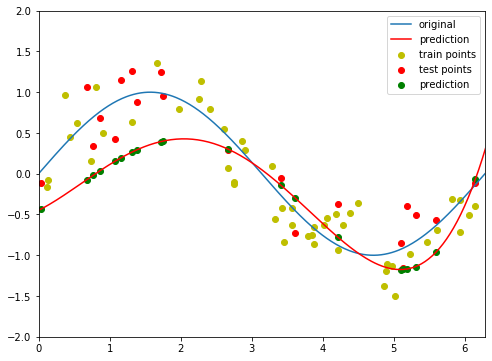

In [10]:
# NTrainPoints = 5
"""
linear regression using lasso linear regression algorithm
and polinomial basis functions
"""

sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

ridgeLR_polinomial = lr.LassoLinearRegression(basisFuncs, xgen, ygen, lamb = 0)
ridgeLR_polinomial.setGradParam(0.000000002, 0.000000001, 5000000, 5)
ridgeLR_polinomial.fit()

ypred_test = ridgeLR_polinomial.predict(xtest)
print("MSE test set = {}".format(ridgeLR_polinomial.meanSquareError(ytest)))

ridgeLR_polinomial.predict(xgen)
print("MSE train set = {}".format(ridgeLR_polinomial.meanSquareError(ygen)))

plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = ridgeLR_polinomial.predict(xPredictLine)
ridgeLR_polinomial.reportGradStatus()

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()